### Business problem overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

### Step 1-Reading and understanding the data

In [2]:
df=pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.

Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle :

The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.

The ‘action’ phase: The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase. Also, it is important to note that at the time of prediction (i.e. the action months), this data is not available to you for prediction. Thus, after tagging churn as 1/0 based on this phase, you discard all data corresponding to this phase.

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

In [3]:
#Checking the shape of the dataset
df.shape

(99999, 226)

 There are 99999 data points and 226 features

In [4]:
#Checking the numerical columns
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Step 2-Data Cleaning and Preparation

In [5]:
# Dropping the duplicate rows
df.drop_duplicates(inplace=True)

#### High-value churn
In the Indian and the Southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce the churn of the high-value customers, we will be able to reduce significant revenue leakage.
#### high-value customers 
Here I have defined high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In this project I will predict churn only on high-value customers.


#### Filtering high value customers

In [6]:
#Filtering High value customer
df=df[(df.total_rech_amt_6+df.total_rech_amt_7)>=np.percentile((df.total_rech_amt_6+df.total_rech_amt_7),70)]

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df.shape

(30011, 226)

After filtering high value customers we are left with about 30k data points

#### Tagging Churners

Now tagging the churned customers (churn=1, else 0) based on the fourth month(churn phase) as follows:

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [9]:
df["churn"]=df["total_ic_mou_9"]+df["total_og_mou_9"]+df["vol_2g_mb_9"]+df["vol_3g_mb_9"]
df['churn']=df['churn'].apply(lambda x:1 if x==0 else 0)

#### Removing attributes of churn phase

Removing all the columns of the churn phase ie ending with "_9" or having september in their name

As we have to use the data available during the first 3 months and predict the churn. So the 4th month data (churn phase) will not be available for us during prediction therefore removing all the columns of churn phase from our data.

In [10]:
l=[]
for i in df.columns:
        if i[-2:]=="_9":
            l.append(i)
df.drop(l,axis=1,inplace=True)
df.drop('sep_vbc_3g',axis=1,inplace=True)

#### Removing columns with no variance in data

In [11]:
# Dropping columns with no variance in data as they will not be useful in our analysis

no_var=[]
for i in df.columns:
    if df[i].dtypes in ["float64","int64"]:
        if df[i].var()==0:
            no_var.append(i)
df.drop(no_var,axis=1,inplace=True)   
df.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)


Dropping the features which are having no varince in data as they will not be useful for our model building

#### Null values in dataframe

In [12]:
for i in df.columns:
    if df[i].isnull().sum()/len(df)*100>30:
        df.drop(i,axis=1,inplace=True)

Dropping all the features with more than 30 percent of missing values

In [13]:
df.shape

(30011, 129)

In [14]:
# Checking the missing value percent again
(df.isnull().sum()/len(df)*100)

mobile_number          0.000000
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
onnet_mou_6            1.052947
onnet_mou_7            1.009630
onnet_mou_8            3.125521
offnet_mou_6           1.052947
offnet_mou_7           1.009630
offnet_mou_8           3.125521
roam_ic_mou_6          1.052947
roam_ic_mou_7          1.009630
roam_ic_mou_8          3.125521
roam_og_mou_6          1.052947
roam_og_mou_7          1.009630
roam_og_mou_8          3.125521
loc_og_t2t_mou_6       1.052947
loc_og_t2t_mou_7       1.009630
loc_og_t2t_mou_8       3.125521
loc_og_t2m_mou_6       1.052947
loc_og_t2m_mou_7       1.009630
loc_og_t2m_mou_8       3.125521
loc_og_t2f_mou_6       1.052947
loc_og_t2f_mou_7       1.009630
loc_og_t2f_mou_8       3.125521
loc_og_t2c_mou_6       1.052947
loc_og_t2c_mou_7       1.009630
loc_og_t2c_mou_8       3.125521
loc_og_mou_6           1.052947
loc_og_mou_7           1.009630
loc_og_mou_8           3.125521
std_og_t

Insight
>As we can clearly see that there is a trend in the number of missing values, the missing values remains similar for the first two months(the good phase) and always then tend to increase for the third month.

These missing values are the instances where the customer has stopped using the services. Hence they can be replaced with 0.

In [15]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype in ["float64","int64"]:
            df[i].fillna(0,inplace=True)

In [16]:
#Dropping the column mobile number as it will not be useful for our analysis
df.drop('mobile_number',axis=1,inplace=True)

In [17]:
# Let's drop the date columns as they will not be useful for our analysis
date_columns = ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']
df.drop(date_columns,axis=1,inplace=True)

In [18]:
# Let's check the data description for the arpu columns

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']

def describe_ARPU_Columns():
    for column in arpu_columns:
        print("Column Description for -",column, end='\n')
        print(df[column].describe(), end='\n')
        print("----------------------------------------", end='\n')

describe_ARPU_Columns()

Column Description for - arpu_6
count    30011.000000
mean       587.284404
std        442.722413
min      -2258.709000
25%        364.161000
50%        495.682000
75%        703.922000
max      27731.088000
Name: arpu_6, dtype: float64
----------------------------------------
Column Description for - arpu_7
count    30011.000000
mean       589.135427
std        462.897814
min      -2014.045000
25%        365.004500
50%        493.561000
75%        700.788000
max      35145.834000
Name: arpu_7, dtype: float64
----------------------------------------
Column Description for - arpu_8
count    30011.000000
mean       534.857433
std        492.259586
min       -945.808000
25%        289.609500
50%        452.091000
75%        671.150000
max      33543.624000
Name: arpu_8, dtype: float64
----------------------------------------


The MINIMUM value for all the arpu related columns are NEGATIVE. Now as per the defination of ARPU which says -

>"The average revenue per user is the average billing per customer earned by the telecom company every month".

So the revenue generated from a user cannot be negative. If a customer is not using any services then apru for the person would be zero (rather that being negative). We will drop all such observations where arpu is negetive.

In [19]:
# Let's delete the observations with negative arpu values. 

df = df[(df['arpu_6'] >= 0) & 
                            (df['arpu_7'] >= 0) & 
                            (df['arpu_8'] >= 0)]

In [20]:
df.shape

(29862, 125)

### Feature Engineering

### Derived Columns

In [21]:
# Derived columns
def derive_good_action_phase(df, col):
    col_6 = col + "_6"
    col_7 = col + "_7"
    col_8 = col + "_8"
    good_phase_col = col + "_good_phase"
    action_phase_col = col + "_action_phase"
    df[good_phase_col] = (df[col_6] + df[col_7])/2
    df[action_phase_col] = df[col_8]
    df.drop([col_6, col_7, col_8], axis = 1, inplace = True)
    return df


In [22]:
# Derive Good and Action Phase Variables

df = derive_good_action_phase(df, "arpu")

df = derive_good_action_phase(df, "onnet_mou")

df = derive_good_action_phase(df, "offnet_mou")

df = derive_good_action_phase(df, "roam_ic_mou")

df = derive_good_action_phase(df, "roam_og_mou")

df = derive_good_action_phase(df, "loc_og_mou")

df = derive_good_action_phase(df, "std_og_mou")

df = derive_good_action_phase(df, "isd_og_mou")

df = derive_good_action_phase(df, "spl_og_mou")

df = derive_good_action_phase(df, "og_others")

df = derive_good_action_phase(df, "total_og_mou")

df = derive_good_action_phase(df, "loc_ic_mou")

df = derive_good_action_phase(df, "std_ic_mou")

df = derive_good_action_phase(df, "spl_ic_mou")

df = derive_good_action_phase(df, "isd_ic_mou")

df = derive_good_action_phase(df, "ic_others")

df = derive_good_action_phase(df, "total_ic_mou")

df = derive_good_action_phase(df, "total_rech_num")

df = derive_good_action_phase(df, "total_rech_amt")

df = derive_good_action_phase(df, "max_rech_amt")

df = derive_good_action_phase(df, "vol_2g_mb")

df = derive_good_action_phase(df, "vol_3g_mb")

df = derive_good_action_phase(df, "monthly_2g")

df = derive_good_action_phase(df, "sachet_2g")

df = derive_good_action_phase(df, "monthly_3g")

df = derive_good_action_phase(df, "sachet_3g")

df.head()

,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase
0,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0,0,779,802,57.74,19.38,18.74,1,1209.5150,3171.480,56.260,52.29,510.295,325.91,24.860,31.64,18.165,38.06,478.035,255.79,68.000,77.84,0.09,10.01,2.25,6.50,0.000,0.0,548.385,350.16,391.555,188.04,176.810,193.94,0.105,0.0,8.295,31.59,15.465,15.14,592.250,428.74,5.0,7,1185.0,3638,1185.0,1580,0.0,0.00,0.000,0.00,0.0,0,0.0,0,0.0,0,0.0,0
1,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,50,0,10,315,21.03,910.65,122.16,0,435.4720,137.362,382.360,35.08,87.645,136.48,0.000,0.00,0.000,0.00,333.135,63.04,136.870,98.28,0.00,0.00,0.00,10.23,0.000,0.0,470.010,171.56,52.630,15.79,13.545,0.75,0.000,0.0,0.000,0.00,0.000,0.00,66.175,16.54,20.0,14,519.0,120,122.0,30,178.0,0.03,375.475,11.94,0.5,0,0.5,3,0.0,0,0.0,0
2,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,110,50,0,2607,0.00,0.00,0.00,0,349.2585,593.260,305.075,534.24,266.295,482.46,83.885,72.11,21.620,1.44,129.395,353.99,420.355,655.18,0.00,1.29,0.00,4.78,0.000,0.0,549.750,1015.26,120.845,255.26,245.950,474.41,0.225,0.0,153.695,393.39,49.860,21.44,570.595,1144.53,5.0,11,380.0,717,110.0,130,0.0,0.02,0.000,0.00,0.0,0,0.0,3,0.0,0,0.0,0
3,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,100,100,130,511,0.00,2.45,21.89,0,365.4220,187.894,62.260,70.61,263.015,162.76,1.415,0.00,8.870,0.00,265.775,205.93,48.990,21.53,0.00,0.00

In [23]:
# We can see that there are some columns whose aggregate is available as a total column, so we can drop the individual columns

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

df.drop(individual_cols, axis = 1, inplace = True)

df.shape

(29862, 57)

In [24]:
df['vbc_3g_good_phase']=(df['jun_vbc_3g']+df['jul_vbc_3g'])/2
df['vbc_3g_action_phase']=df['aug_vbc_3g']
df.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g'],axis=1,inplace=True)

In [25]:
df=df.reset_index(drop=True)

In [26]:
df

,aon,churn,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase
0,802,1,1209.5150,3171.480,56.260,52.29,510.295,325.91,24.860,31.64,18.165,38.06,478.035,255.79,68.000,77.84,0.09,10.01,2.250,6.50,0.000,0.0,548.385,350.16,391.555,188.04,176.810,193.94,0.105,0.0,8.295,31.59,15.465,15.14,592.250,428.74,5.0,7,1185.0,3638,1185.0,1580,0.000,0.00,0.000,0.00,0.0,0,0.0,0,0.0,0,0.0,0,19.060,57.74
1,315,0,435.4720,137.362,382.360,35.08,87.645,136.48,0.000,0.00,0.000,0.00,333.135,63.04,136.870,98.28,0.00,0.00,0.000,10.23,0.000,0.0,470.010,171.56,52.630,15.79,13.545,0.75,0.000,0.0,0.000,0.00,0.000,0.00,66.175,16.54,20.0,14,519.0,120,122.0,30,178.000,0.03,375.475,11.94,0.5,0,0.5,3,0.0,0,0.0,0,516.405,21.03
2,2607,0,349.2585,593.260,305.075,534.24,266.295,482.46,83.885,72.11,21.620,1.44,129.395,353.99,420.355,655.18,0.00,1.29,0.000,4.78,0.000,0.0,549.750,1015.26,120.845,255.26,245.950,474.41,0.225,0.0,153.695,393.39,49.860,21.44,570.595,1144.53,5.0,11,380.0,717,110.0,130,0.000,0.02,0.000,0.00,0.0,0,0.0,3,0.0,0,0.0,0,0.000,0.00
3,511,0,365.4220,187.894,62.260,70.61,263.015,162.76,1.415,0.00,8.870,0.00,265.775,205.93,48.990,21.53,0.00,0.00,1.630,5.91,0.000,0.0,316.410,233.38,253.345,211.78,119.860,82.44,0.000,0.0,0.000,0.23,0.000,0.00,373.210,294.46,8.0,2,459.0,160,110.0,130,0.000,0.00,0.000,0.00,0.0,0,0.0,0,0.0,0,0.0,0,12.170,0.00
4,667,0,354.4940,25.499,597.595,7.79,30.820,5.54,2.380,4.81,4.230,13.34,48.770,0.00,574.635,0.00,0.00,0.00,1.290,0.00,0.465,0.0,625.170,0.00,42.135,0.00,4.955,0.00,0.000,0.0,0.000,0.00,0.000,0.00,47.095,0.00,10.5,4,408.0,30,55.0,30,0.000,0.00,0.000,0.00,0.0,0,0.0,0,0.0,0,0.0,0,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29857,1022,0,335.9415,290.851,73.800,97.61,414.860,355.48,2.530,0.00,23.020,0.00,88.520,137.89,373.620,294.34,0.00,0.00,4.415,20.96,0.000,0.0,466.560,453.21,127.250,237.63,19.720,61.11,0.000,0.0,0.000,0.00,1.400,2.66,148.380,301.41,15.0,13,392.0,337,78.5,67,0.000,0.00,0.000,0.00,0.0,0,3.0,0,0.0,0,0.0,0,0.000,0.00
29858,3054,0,367.6980,371.016,8.780,1.30,397.595,360.58,0.000,0.00,0.000,0.00,382.200,354.91,23.700,6.18,0.00,0.00,3.305,2.83,1.540,0.0,410.760,363.93,95.875,47.71,11.985,5.41,0.000,0.0,0.000,0.00,0.805,0.00,108.675,53.13,7.5,3,465.0,388,120.0,130,0.000,0.00,0.000,0.00,0.0,0,0.0,0,0.0,0,0.0,0,0.000,0.00
29859,2696,0,550.1005,564.334,678.045,775.41,700.945,595.44,0.000,0.00,0.000,0.00,1181.455,1225.06,194.200,145.79,0.00,0.00,16.335,9.15,0.000,0.0,1392.000,1380.01,592.170,635.84,9.110,24.16,0.000,0.0,0.215,0.00,0.000,0.00,601.505,660.01,7.0,3,848.5,25,668.0,25,25.345,6.47,932.675,926.78,0.0,0,1.0,1,0.0,0,0.0,0,601.375,497.45
29860,328,0,4

## EDA

### Univariate Analysis

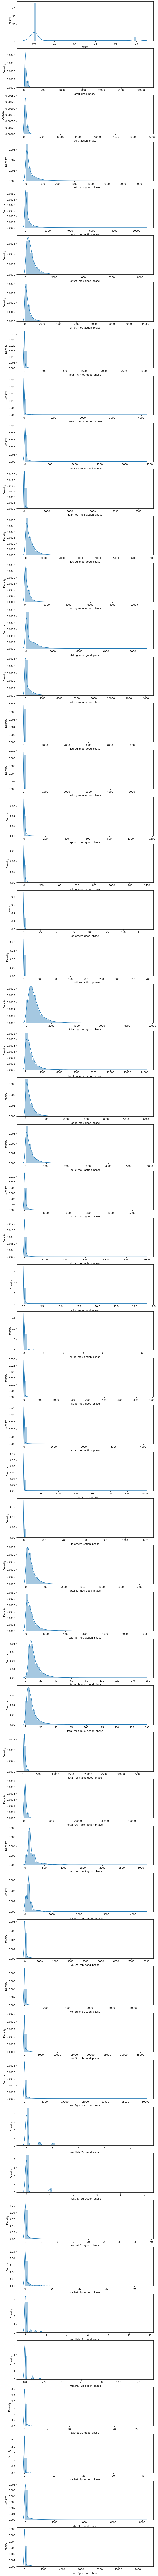

In [27]:
plt.figure(figsize=(10,200))
for i in range(1,len(df.columns)):
    plt.subplot(57,1,i)
    sns.distplot(df[df.columns[i]])

> We can infer that there are some outliers in the data

### Bivariate Analysis

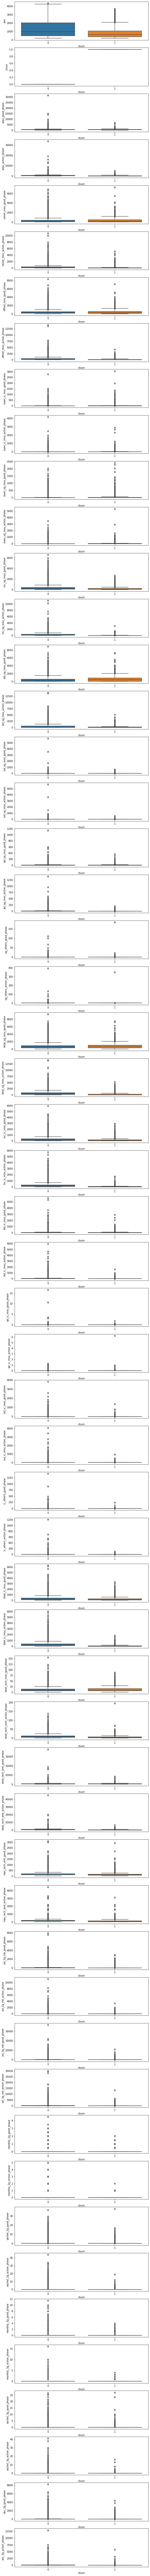

In [28]:
plt.figure(figsize=(10,200))
for i in range(1,len(df.columns)+1):
    plt.subplot(57,1,i)
    sns.boxplot(df.churn,df[df.columns[i-1]])

## Modelling

### Train Test split

In [29]:
X = df.drop('churn', axis = 1)
y = df[['churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20903, 55)
(20903, 1)
(8959, 55)
(8959, 1)


### Scaling the data

In [30]:
# Normalize the data
scaler = RobustScaler()

scaled_data = scaler.fit_transform(X_train)

X_train = pd.DataFrame(data = scaled_data, index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

In [31]:
X_train

,aon,arpu_good_phase,arpu_action_phase,onnet_mou_good_phase,onnet_mou_action_phase,offnet_mou_good_phase,offnet_mou_action_phase,roam_ic_mou_good_phase,roam_ic_mou_action_phase,roam_og_mou_good_phase,roam_og_mou_action_phase,loc_og_mou_good_phase,loc_og_mou_action_phase,std_og_mou_good_phase,std_og_mou_action_phase,isd_og_mou_good_phase,isd_og_mou_action_phase,spl_og_mou_good_phase,spl_og_mou_action_phase,og_others_good_phase,og_others_action_phase,total_og_mou_good_phase,total_og_mou_action_phase,loc_ic_mou_good_phase,loc_ic_mou_action_phase,std_ic_mou_good_phase,std_ic_mou_action_phase,spl_ic_mou_good_phase,spl_ic_mou_action_phase,isd_ic_mou_good_phase,isd_ic_mou_action_phase,ic_others_good_phase,ic_others_action_phase,total_ic_mou_good_phase,total_ic_mou_action_phase,total_rech_num_good_phase,total_rech_num_action_phase,total_rech_amt_good_phase,total_rech_amt_action_phase,max_rech_amt_good_phase,max_rech_amt_action_phase,vol_2g_mb_good_phase,vol_2g_mb_action_phase,vol_3g_mb_good_phase,vol_3g_mb_action_phase,monthly_2g_good_phase,monthly_2g_action_phase,sachet_2g_good_phase,sachet_2g_action_phase,monthly_3g_good_phase,monthly_3g_action_phase,sachet_3g_good_phase,sachet_3g_action_phase,vbc_3g_good_phase,vbc_3g_action_phase
22921,0.901583,-0.419244,-0.455905,0.075606,0.074535,0.597771,0.384852,0.000000,0.00,0.000000,0.00,0.736687,0.576323,0.189555,0.228192,0.000,0.0,-0.250000,-0.079687,0.00,0.0,0.237012,0.118520,-0.088022,0.044161,0.637937,0.262970,0.00,0.0,0.000000,0.00,3.02,372.666667,-0.093570,0.021989,-0.411765,0.333333,-0.384835,-0.239669,0.172222,0.106870,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.000000,0.000000
10225,0.156917,-0.345738,-1.029850,-0.150051,-0.321704,1.035448,-0.281151,0.000000,0.00,0.000000,0.00,-0.368319,-0.472150,0.878958,0.131467,0.125,0.0,2.330737,3.010937,4.45,0.0,0.399718,-0.424931,-0.162276,-0.399227,0.931114,0.089005,0.00,0.0,0.030864,0.00,0.00,0.000000,-0.114093,-0.445867,0.117647,-0.444444,-0.363376,-0.964876,0.044444,-0.786260,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2582,0.068823,-0.526227,-0.363378,0.242114,0.293822,-0.153878,0.114993,31.343003,0.00,18.212067,0.00,-0.123577,0.145790,0.045310,0.413302,0.000,0.0,0.465297,-0.079687,0.00,0.0,-0.364694,0.049396,-0.235131,0.127753,0.909402,1.650881,0.00,0.0,0.000000,0.00,0.00,0.000000,-0.179720,0.210112,0.352941,0.444444,-0.549356,-0.326446,-0.055556,-0.015267,0.000000,0.000000,0.000000,0.00,0.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000
22794,-0.403992,0.365644,-0.123051,0.821023,0.745165,-0.141632,-0.091969,4.716724,0.00,1.141735,0.00,1.352511,1.073527,-0.184356,-0.125118,0.000,0.0,-0.250000,2.104687,0.00,0.0,0.178773,0.116609,1.717531,0.615894,3.086080,0.834603,0.00,0.0,0.154321,0.00,0.20,0.000000,1.824818,0.504724,-0.294118,-0.111111,0.206009,0.303719,0.311111,0.167939,1.204397,3.974719,10.381359,821.06,0.0,0.0,1.5,1.0,0.0,0.0,1.5,1.0,27.178013,307.482966
7120,0.673090,1.140384,0.381467,0.630052,0.319801,1.723795,1.296346,12.520478,4.89,4.303463,1.33,2.749844,2.259655,0.102090,0.016742,0.000,0.0,0.087819,0.753125,0.30,0.0,1.228893,0.776778,0.333343,0.471857,1.418054,5.009281,0.00,0.0,0.000000,0.00,24.46,30.833333,0.405193,0.967971,0.000000,0.111111,1.350501,0.626033,0.011111,0.106870,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,1.092223,0.588668,1.292548,-0.024820,0.047751,-0.228705,0.032689,0.000000,0.00,0.000000,0.00,0.473980,0.625071,-0.239875,-0.130147,0.000,0.0,-0.250000,1.854688,0.00,0.0,-0.349302,-0.104540,0.497957,0.599728,-0.276535,-0.239886,0.00,0.0,0.000000,0.00,0.46,0.000000,0.262969,0.342605,-0.529412,0.000000,0.151645,1.283058,1.422222,2.480916,5.335650,21.497191,14.161625,1214.11,0.0,0.0,0.0,0.0,1.5

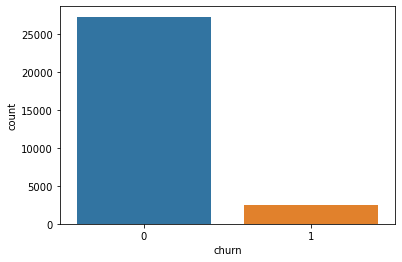

In [32]:
# Checking for Class imbalance
sns.countplot(df['churn']);

We can clearly see this is a case of class imbalance, We should handle using some class imbalance techniques like SMOTE

### Handling class imbalance using SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

smot = SMOTE(random_state=100)
X_train, y_train = smot.fit_resample(X_train, y_train)

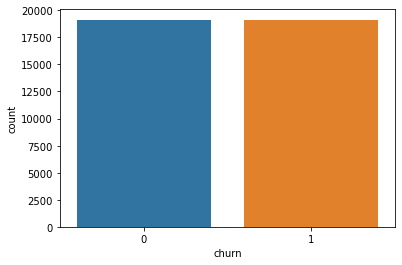

In [34]:
sns.countplot(y_train['churn']);

## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [36]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)  
rfe = rfe.fit(X_train, y_train)

In [37]:
rfe.support_

array([ True, False, False,  True, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False])

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('aon', True, 1),
 ('arpu_good_phase', False, 2),
 ('arpu_action_phase', False, 4),
 ('onnet_mou_good_phase', True, 1),
 ('onnet_mou_action_phase', False, 7),
 ('offnet_mou_good_phase', True, 1),
 ('offnet_mou_action_phase', False, 6),
 ('roam_ic_mou_good_phase', False, 24),
 ('roam_ic_mou_action_phase', False, 39),
 ('roam_og_mou_good_phase', False, 32),
 ('roam_og_mou_action_phase', False, 28),
 ('loc_og_mou_good_phase', False, 13),
 ('loc_og_mou_action_phase', True, 1),
 ('std_og_mou_good_phase', False, 12),
 ('std_og_mou_action_phase', False, 16),
 ('isd_og_mou_good_phase', False, 25),
 ('isd_og_mou_action_phase', False, 27),
 ('spl_og_mou_good_phase', False, 31),
 ('spl_og_mou_action_phase', False, 20),
 ('og_others_good_phase', False, 14),
 ('og_others_action_phase', True, 1),
 ('total_og_mou_good_phase', True, 1),
 ('total_og_mou_action_phase', True, 1),
 ('loc_ic_mou_good_phase', True, 1),
 ('loc_ic_mou_action_phase', True, 1),
 ('std_ic_mou_good_phase', False, 19),
 ('std_ic_

In [39]:
col=X_train.columns[rfe.support_]

### 1st Logistic model

In [40]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38264
Model:                            GLM   Df Residuals:                    38248
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15728.
Date:                Thu, 10 Mar 2022   Deviance:                       31457.
Time:                        23:02:19   Pearson chi2:                 7.02e+09
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.5820      0.027    -21.440      0.000      -0.635      -0.529
aon                            -0.5670      0.027    -21.178      0.000      -0.620      -0.515
onnet_mou_good_phase            0.7423      0.046     16.122      0.000       0.652       0.833
offnet_mou_good_phase           0.8055      0.050     16.006      0.000       0.707       0.904
loc_og_mou_action_phase        -0.5635      0.040    -14.263      0.000      -0.641      -0.486
og_others_action_phase         -0.8780      0.370     -2.374      0.018      -1.603      -0.153
total_og_mou_good_phase        -0.6088      0.079     -7.745      0.000      -0.763      -0.455
total_og_mou_action_phase      -0.9842      0.032    -30.813      0.000      -1.047      -0.922
loc_ic_mou_good_phase           0.6410      0.034     19.012      0.000       0.575       0.707
loc_ic_mou_action_phase        -1.5080      0.075    -20.126      0.000      -1.655      -1.361
spl_ic_mou_action_phase        -3.1664      0.222    -14.295      0.000      -3.601      -2.732
total_ic_mou_action_phase      -0.4084      0.051     -7.942      0.000      -0.509      -0.308
total_rech_num_action_phase    -0.4664      0.022    -21.179      0.000      -0.510      -0.423
monthly_2g_good_phase          -0.3454      0.068     -5.097      0.000      -0.478      -0.213
monthly_2g_action_phase        -1.3475      0.083    -16.301      0.000      -1.510      -1.186
monthly_3g_action_phase        -0.8046      0.043    -18.616      0.000      -0.889      -0.720
===============================================================================================
"""

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_good_phase,15.61
1,onnet_mou_good_phase,7.48
8,loc_ic_mou_action_phase,7.41
2,offnet_mou_good_phase,7.28
10,total_ic_mou_action_phase,5.67
6,total_og_mou_action_phase,2.43
7,loc_ic_mou_good_phase,2.34
3,loc_og_mou_action_phase,1.85
12,monthly_2g_good_phase,1.65
13,monthly_2g_action_phase,1.61


In [42]:
# Dropping std_og_mou_good_phase variable as it has high VIF
col=col.drop('total_og_mou_good_phase')

### 2nd Logistic Regression model

In [43]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38264
Model:                            GLM   Df Residuals:                    38249
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15762.
Date:                Thu, 10 Mar 2022   Deviance:                       31523.
Time:                        23:02:20   Pearson chi2:                 9.05e+09
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.4467      0.021    -21.543      0.000      -0.487      -0.406
aon                            -0.5480      0.027    -20.661      0.000      -0.600      -0.496
onnet_mou_good_phase            0.4115      0.016     25.709      0.000       0.380       0.443
offnet_mou_good_phase           0.4446      0.017     25.768      0.000       0.411       0.478
loc_og_mou_action_phase        -0.5676      0.040    -14.353      0.000      -0.645      -0.490
og_others_action_phase         -0.9079      0.377     -2.409      0.016      -1.646      -0.169
total_og_mou_action_phase      -1.0333      0.032    -32.622      0.000      -1.095      -0.971
loc_ic_mou_good_phase           0.5947      0.033     18.140      0.000       0.530       0.659
loc_ic_mou_action_phase        -1.4726      0.074    -19.824      0.000      -1.618      -1.327
spl_ic_mou_action_phase        -3.2091      0.222    -14.439      0.000      -3.645      -2.773
total_ic_mou_action_phase      -0.4009      0.051     -7.833      0.000      -0.501      -0.301
total_rech_num_action_phase    -0.4603      0.022    -21.061      0.000      -0.503      -0.417
monthly_2g_good_phase          -0.3541      0.068     -5.232      0.000      -0.487      -0.221
monthly_2g_action_phase        -1.3434      0.082    -16.306      0.000      -1.505      -1.182
monthly_3g_action_phase        -0.7993      0.043    -18.523      0.000      -0.884      -0.715
===============================================================================================
"""

In [44]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,loc_ic_mou_action_phase,7.41
9,total_ic_mou_action_phase,5.66
6,loc_ic_mou_good_phase,2.34
5,total_og_mou_action_phase,2.29
3,loc_og_mou_action_phase,1.85
11,monthly_2g_good_phase,1.63
12,monthly_2g_action_phase,1.61
10,total_rech_num_action_phase,1.39
1,onnet_mou_good_phase,1.21
2,offnet_mou_good_phase,1.20


> All the VIFs are under 10.

In [45]:
churn_df=y_train.copy()

In [46]:
churn_df['churn_Prob']=res.predict(X_train_sm)

In [47]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    churn_df[i]= churn_df.churn_Prob.map(lambda x: 1 if x > i else 0)
churn_df.head()

,churn,churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.202123,1,1,1,0,0,0,0,0,0,0
1,0,0.809650,1,1,1,1,1,1,1,1,1,0
2,0,0.230802,1,1,1,0,0,0,0,0,0,0
3,0,0.328044,1,1,1,1,0,0,0,0,0,0
4,0,0.056740,1,0,0,0,0,0,0,0,0,0


In [48]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(churn_df.churn, churn_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.682731  0.976688  0.388773
0.2   0.2  0.747439  0.955310  0.539567
0.3   0.3  0.786875  0.925831  0.647920
0.4   0.4  0.814290  0.891491  0.737090
0.5   0.5  0.830337  0.850355  0.810318
0.6   0.6  0.831669  0.791449  0.871890
0.7   0.7  0.815231  0.714144  0.916318
0.8   0.8  0.759042  0.565440  0.952645
0.9   0.9  0.613867  0.246289  0.981445


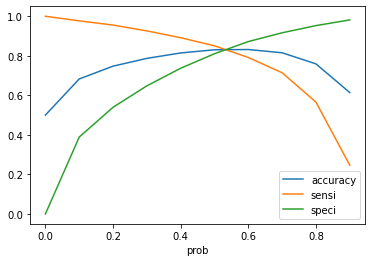

In [49]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### Taking the optimum probalibily cutoff as 0.54

In [50]:
churn_df['final_predicted'] = churn_df.churn_Prob.map( lambda x: 1 if x > 0.54 else 0)

churn_df.head()

,churn,churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.202123,1,1,1,0,0,0,0,0,0,0,0
1,0,0.809650,1,1,1,1,1,1,1,1,1,0,1
2,0,0.230802,1,1,1,0,0,0,0,0,0,0,0
3,0,0.328044,1,1,1,1,0,0,0,0,0,0,0
4,0,0.056740,1,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_train.churn, churn_df.final_predicted))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83     19132
           1       0.83      0.83      0.83     19132

    accuracy                           0.83     38264
   macro avg       0.83      0.83      0.83     38264
weighted avg       0.83      0.83      0.83     38264



## Plotting the ROC Curve

In [53]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [54]:
fpr, tpr, thresholds = metrics.roc_curve( churn_df.churn, churn_df.churn_Prob, drop_intermediate = False )

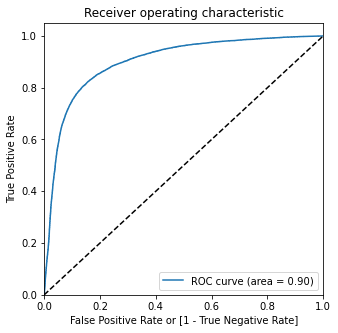

In [55]:
draw_roc( churn_df.churn, churn_df.churn_Prob)

### Making Predictions on the test set

In [56]:
X_test_sm=sm.add_constant(X_test[col])
churn_df_test=res.predict(X_test_sm)

In [57]:
churn_df_test=pd.DataFrame(churn_df_test)

In [58]:
churn_df_test.rename(columns={0:'churn_prob'},inplace=True)

In [59]:
churn_df_test['predicted']=churn_df_test.churn_prob.apply(lambda x:1 if x>0.54 else 0)

In [60]:
churn_df_test

,churn_prob,predicted
2353,0.043958,0
10851,0.002314,0
9977,0.153248,0
15025,0.060846,0
19741,0.188961,0
...,...,...
16870,0.164453,0
15716,0.779473,1
29844,0.010735,0
18884,0.589720,1


In [61]:
print(classification_report(y_test,churn_df_test.predicted))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8209
           1       0.31      0.80      0.44       750

    accuracy                           0.83      8959
   macro avg       0.64      0.82      0.67      8959
weighted avg       0.92      0.83      0.86      8959



> We are having a recall value of 80 percent with the Logistic Regression model

## Decision Trees

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [63]:
from imblearn.over_sampling import SMOTE
smot = SMOTE(random_state=100)
X_train, y_train = smot.fit_resample(X_train, y_train)

In [64]:
X_train.shape, X_test.shape

((38264, 55), (8959, 55))

In [65]:
from sklearn.tree import DecisionTreeClassifier

### Hyper-parameter tuning for the Decision Tree

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
dt = DecisionTreeClassifier(random_state=42)

In [68]:
params = {
    "max_depth": [2,3,5,10,20,30,40,50,60,70,80,100],
    "min_samples_leaf": [5,10,20,50,100,500],
    "min_samples_split":range(200, 500,20)
    
}

In [69]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=5,
                           n_jobs=-1, verbose=1, scoring="recall")

In [70]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Wall time: 7min 51s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                       100],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500],
                         'min_samples_split': range(200, 500, 20)},
             scoring='recall', verbose=1)

In [71]:
grid_search.best_score_

0.912501579349741

In [72]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=200,
                       random_state=42)

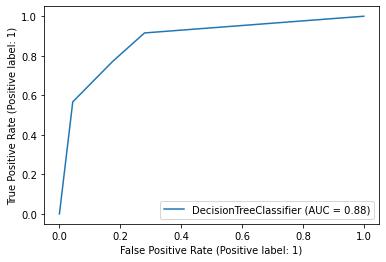

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

#### Classification Report of Tuned Decision Tree Model on the Test Set

In [74]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      8209
           1       0.22      0.86      0.35       750

    accuracy                           0.73      8959
   macro avg       0.60      0.79      0.59      8959
weighted avg       0.92      0.73      0.79      8959



We are obtaining a Recall of 86% on the test set for the hyperparameter tuned Decision Tree Model

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier

### Hyper-parameter tuning for the Random Forest

In [76]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [77]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [78]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [79]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 1min 53s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='recall', verbose=1)

In [80]:
grid_search.best_score_

0.949195065858248

In [81]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

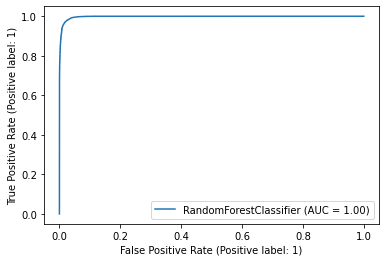

In [82]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

#### Classification Report of Tuned Random Forest Model on the Test Set

In [83]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8209
           1       0.51      0.74      0.60       750

    accuracy                           0.92      8959
   macro avg       0.74      0.84      0.78      8959
weighted avg       0.94      0.92      0.92      8959



We are obtaining a recall score of 73 percent on the Hyperparameter tuned Random Forest Model

In [84]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [85]:
imp_df.sort_values(by="Imp", ascending=False).head(7)

,Varname,Imp
8,roam_ic_mou_action_phase,0.095715
34,total_ic_mou_action_phase,0.095511
10,roam_og_mou_action_phase,0.086618
24,loc_ic_mou_action_phase,0.080217
12,loc_og_mou_action_phase,0.065618
22,total_og_mou_action_phase,0.054567
38,total_rech_amt_action_phase,0.052841


## Results

As we can see that the logistic regression model is performing the best
> We can use the logistic regression model to tag churners and non churners

### Top 7 Features Predicting Churn as Per our Best model (i.e. Logistic Regression) are

In [89]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38264
Model:                            GLM   Df Residuals:                    38249
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15762.
Date:                Thu, 10 Mar 2022   Deviance:                       31523.
Time:                        23:19:29   Pearson chi2:                 9.05e+09
No. Iterations:                    10                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.4467      0.021    -21.543      0.000      -0.487      -0.406
aon                            -0.5480      0.027    -20.661      0.000      -0.600      -0.496
onnet_mou_good_phase            0.4115      0.016     25.709      0.000       0.380       0.443
offnet_mou_good_phase           0.4446      0.017     25.768      0.000       0.411       0.478
loc_og_mou_action_phase        -0.5676      0.040    -14.353      0.000      -0.645      -0.490
og_others_action_phase         -0.9079      0.377     -2.409      0.016      -1.646      -0.169
total_og_mou_action_phase      -1.0333      0.032    -32.622      0.000      -1.095      -0.971
loc_ic_mou_good_phase           0.5947      0.033     18.140      0.000       0.530       0.659
loc_ic_mou_action_phase        -1.4726      0.074    -19.824      0.000      -1.618      -1.327
spl_ic_mou_action_phase        -3.2091      0.222    -14.439      0.000      -3.645      -2.773
total_ic_mou_action_phase      -0.4009      0.051     -7.833      0.000      -0.501      -0.301
total_rech_num_action_phase    -0.4603      0.022    -21.061      0.000      -0.503      -0.417
monthly_2g_good_phase          -0.3541      0.068     -5.232      0.000      -0.487      -0.221
monthly_2g_action_phase        -1.3434      0.082    -16.306      0.000      -1.505      -1.182
monthly_3g_action_phase        -0.7993      0.043    -18.523      0.000      -0.884      -0.715
===============================================================================================
"""

    1 loc_ic_mou_good_phase
    2 offnet_mou_good_phase
    3 onnet_mou_good_phase	    
    4 monthly_2g_good_phase	    
    5 loc_og_mou_good_phase	    
    6 total_ic_mou_action_phase	                        
    7 total_rech_num_action_phase	    

## Recommendations

1 Telecom company needs to pay attention to the roaming rates. 

2 They need to provide good offers to the customers who are using services from a roaming zone.

3 The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and 
  ISD packages.

4 To look into both of the issues stated above, it is desired that the telecom company collects customer query and complaint
  data and work on their services according to the needs of customers.